<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/11-House_Price/Nb_11_House_Pricing_model_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [4]:
df = pd.read_csv('boston.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
missing_vals=df.isnull().sum()
missing_vals

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [8]:
target = "MEDV"
X = df.drop(columns=["CHAS","RAD", target])
y = df[target]
numeric_df = df.drop(columns=["CHAS","RAD"])

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# XG Boost

XGBoost Regressor – Test Results
RMSE: 2.3615
MAE : 1.7166
R²  : 0.9240


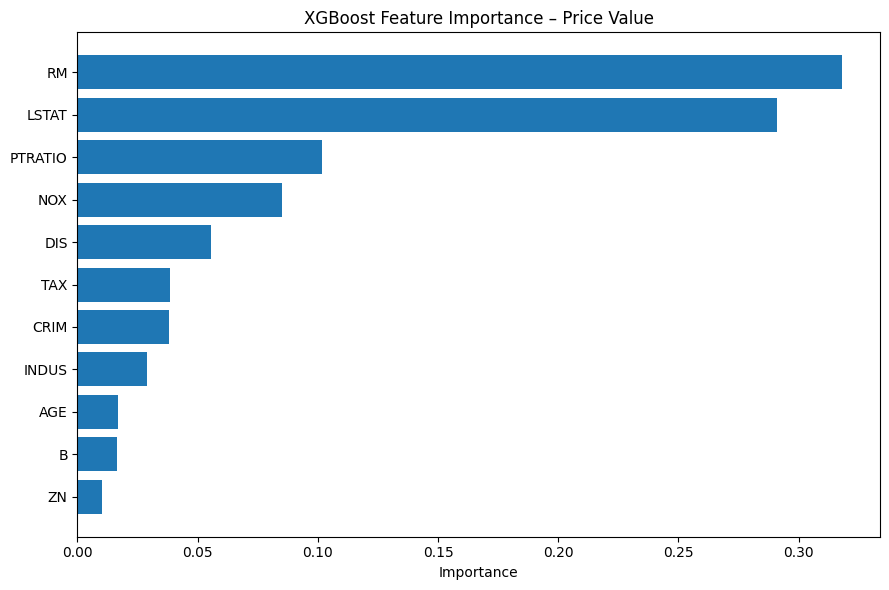

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor

# ==============================
# Split features and target
# ==============================
X = numeric_df.drop(target, axis=1)
y = numeric_df[target]


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# XGBoost Regressor
# ==============================
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("XGBoost Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance – Price Value")
plt.tight_layout()
plt.show()

# Random Forest

Random Forest Regressor – Test Results
RMSE: 3.0133
MAE : 1.9436
R²  : 0.8762


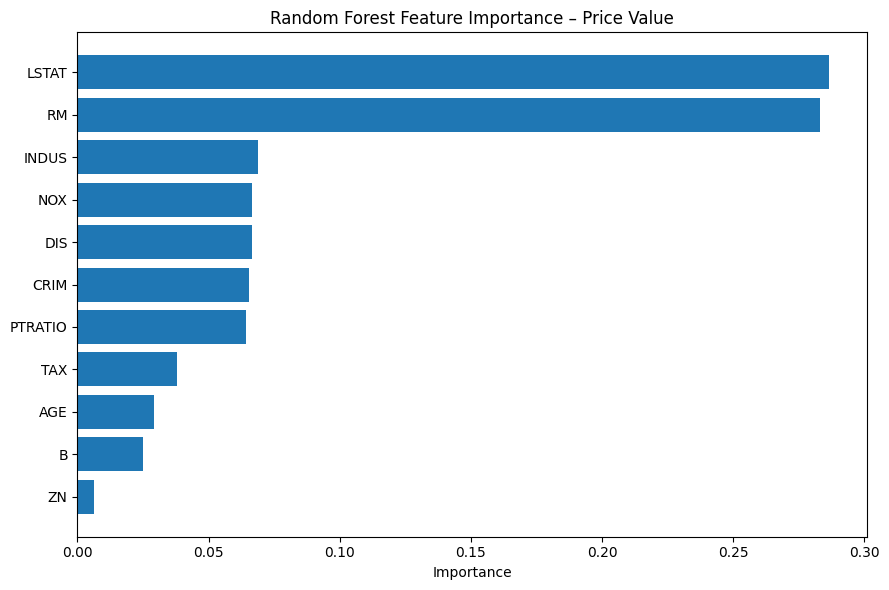

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

# ==============================
# Split features and target
# ==============================
X = numeric_df.drop(target, axis=1)
y = numeric_df[target]


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# Random Forest Regressor
# ==============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
y_pred = rf_model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance – Price Value")
plt.tight_layout()
plt.show()

# CNN

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np

# ------------------------------
# Prepare Dataset
# ------------------------------
class WeatherDataset(Dataset):
    def __init__(self, df):
        self.X = df.drop(target, axis=1).values.astype(np.float32)
        self.y = df[target].values.astype(np.float32).reshape(-1, 1)

        # Add channel dimension for CNN: (samples, channels, features)
        self.X = np.expand_dims(self.X, axis=1)  # channels=1

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), torch.tensor(self.y[idx])


dataset = WeatherDataset(numeric_df)

# Train-test split: 80/20
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

# ------------------------------
# Define CNN Model
# ------------------------------
class TabularCNN(nn.Module):
    def __init__(self, num_features):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(16, 32, kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear((num_features - 2) * 32, 64)  # adjust based on conv output
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


num_features = numeric_df.drop(target, axis=1).shape[1]
model = TabularCNN(num_features)

# ------------------------------
# Loss & Optimizer
# ------------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Train Loop
# ------------------------------
epochs = 200
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


# ------------------------------
# Evaluation
# ------------------------------
model.eval()
y_preds, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_preds.append(outputs.numpy())
        y_true.append(y_batch.numpy())

y_preds = np.vstack(y_preds)
y_true = np.vstack(y_true)

rmse = np.sqrt(np.mean((y_true - y_preds)**2))
mae = np.mean(np.abs(y_true - y_preds))
r2 = 1 - np.sum((y_true - y_preds)**2) / np.sum((y_true - np.mean(y_true))**2)

print("\nCNN Regression Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Epoch [20/200], Loss: 51.0188
Epoch [40/200], Loss: 28.7616
Epoch [60/200], Loss: 23.0894
Epoch [80/200], Loss: 16.4308
Epoch [100/200], Loss: 14.8713
Epoch [120/200], Loss: 11.6715
Epoch [140/200], Loss: 12.5482
Epoch [160/200], Loss: 15.1516
Epoch [180/200], Loss: 9.7142
Epoch [200/200], Loss: 9.6946

CNN Regression Test Results
RMSE: 3.9988
MAE : 2.6816
R²  : 0.8174


# SVM

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [16]:
# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# SVR Model
# -----------------------------
svr_model = SVR(
    kernel='rbf',    # radial basis function (non-linear)
    C=100,           # regularization
    epsilon=0.1,     # insensitive loss
    gamma='scale'    # automatic gamma
)

# Train
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svr_model.predict(X_test_scaled)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Regression – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

SVR Regression – Test Results
RMSE: 3.0742
MAE : 2.0141
R²  : 0.8711


Decision Tree Regressor – Test Results
RMSE: 3.4431
MAE : 2.6382
R²  : 0.8383


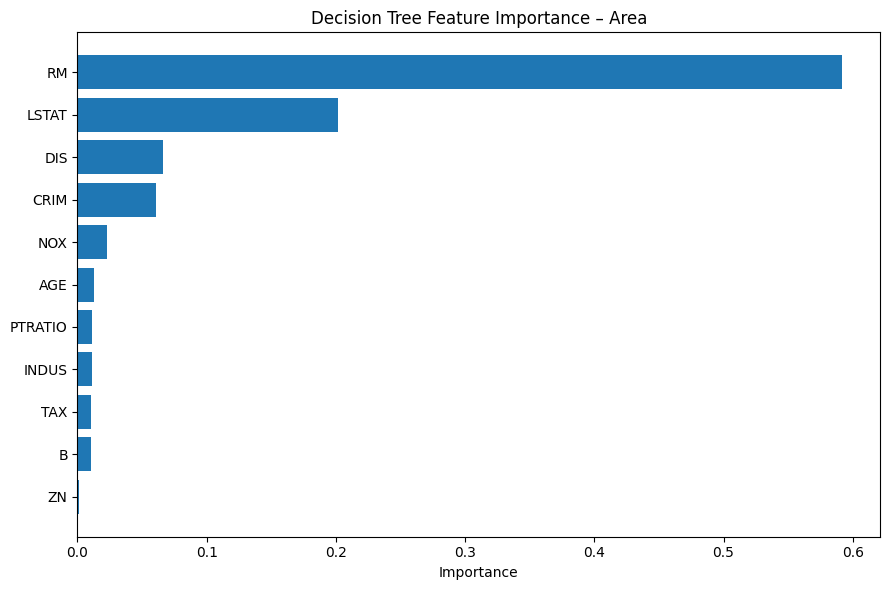

In [17]:
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Decision Tree Regressor
# -----------------------------
dt_model = DecisionTreeRegressor(
    max_depth=None,        # can tune for overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train
dt_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = dt_model.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# -----------------------------
# Feature Importance Plot
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importance – Area")
plt.tight_layout()
plt.show()

# EBM

In [18]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 102.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 22.0 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size

In [19]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

Explainable Boosting Regressor – Test Results
RMSE: 3.0437
MAE : 2.0695
R²  : 0.8737


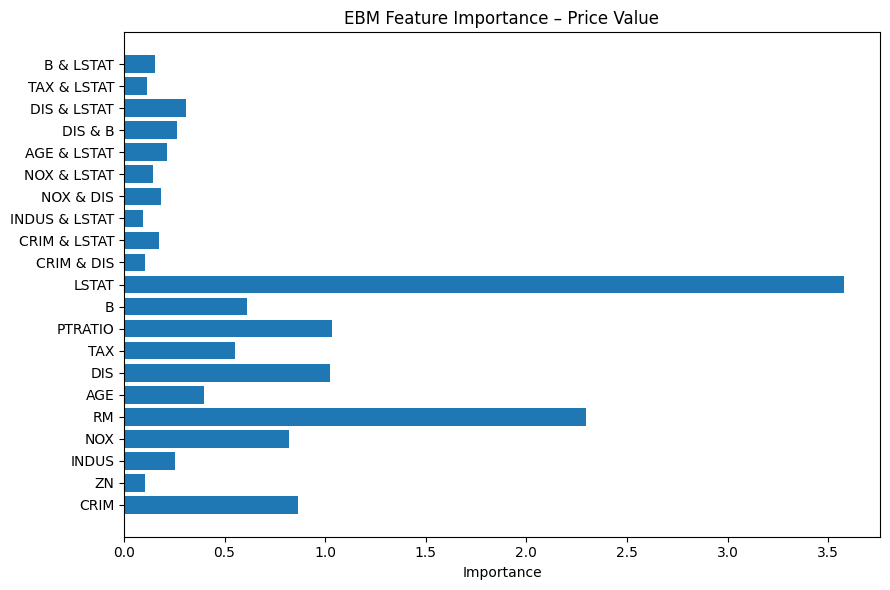

In [22]:
# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# EBM Model
# ==============================
ebm = ExplainableBoostingRegressor(
    random_state=42,
    max_bins=256,
    interactions=10
)

# Train
ebm.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = ebm.predict(X_test)

# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("Explainable Boosting Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Global Explanation (EBM)
# ==============================
global_exp = ebm.explain_global()
show(global_exp)


# ==============================
# Feature Importance Plot (Static)
# ==============================
importances = global_exp.data()['scores']
features = global_exp.data()['names']

plt.figure(figsize=(9, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("EBM Feature Importance – Price Value")
plt.tight_layout()
plt.show()

# GAM - Generalized additive model

In [21]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 5.2 MB/s eta 0:00:00


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

GAM (Generalized Additive Model) – Price Value
RMSE: 3.2328
MAE : 2.2522
R²  : 0.8575

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     94.9514
Link Function:                     IdentityLink Log Likelihood:                                  -981.4496
Number of Samples:                          404 AIC:                                              2154.802
                                                AICc:                                            2215.3958
                                                GCV:                                               16.2158
                                                Scale:                                              3.0892
                                                Pseudo R-

/tmp/ipython-input-970521118.py:46: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




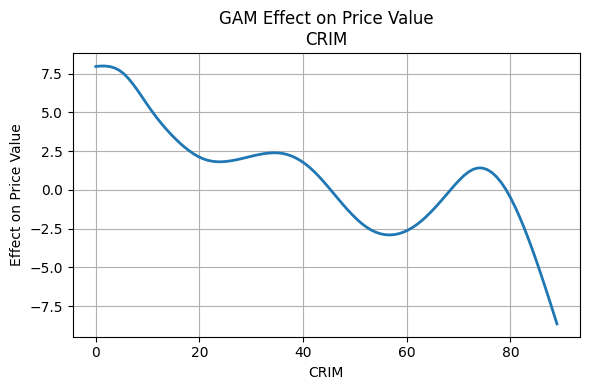

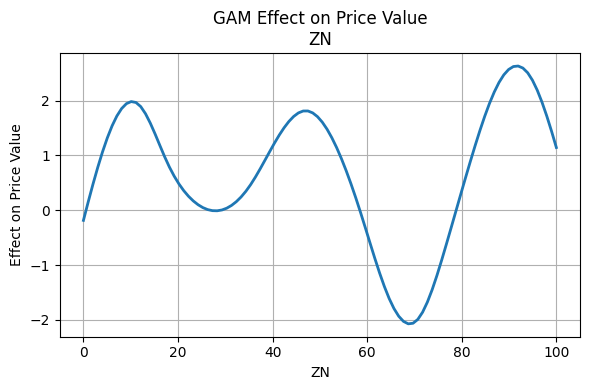

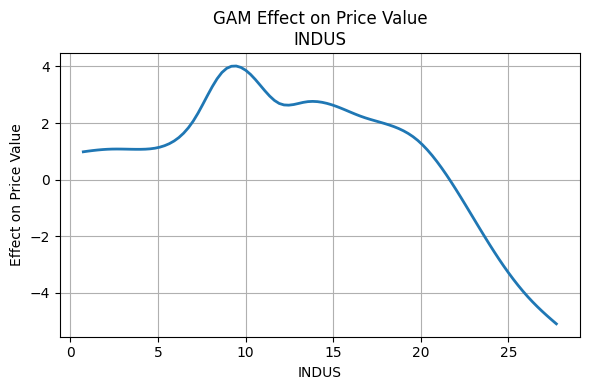

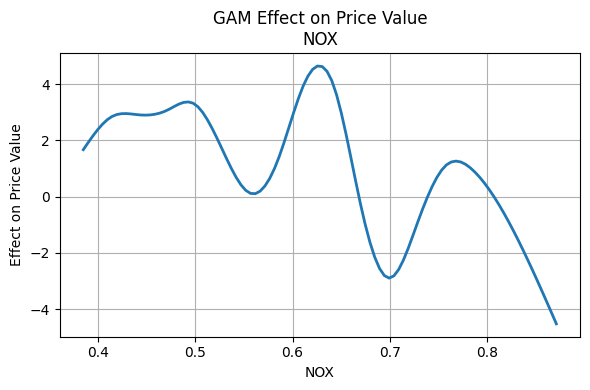

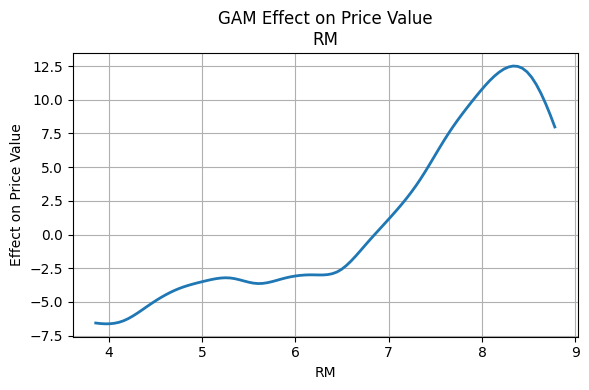

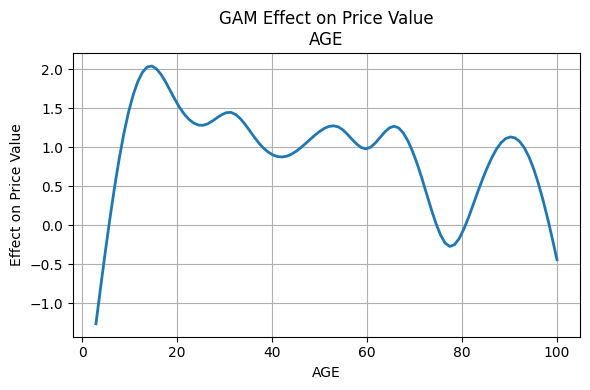

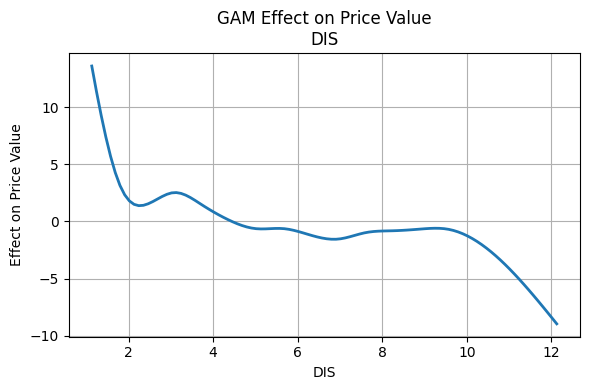

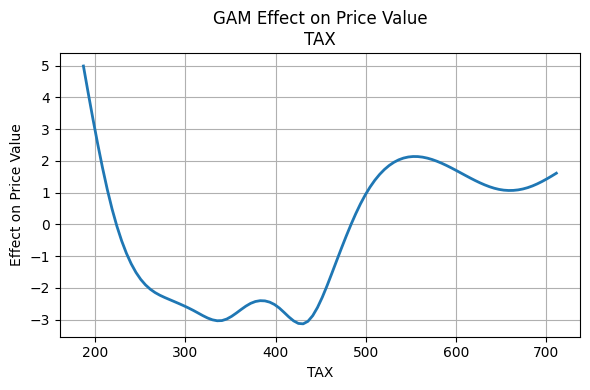

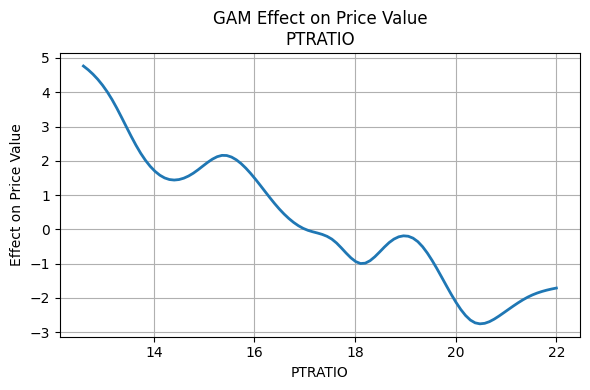

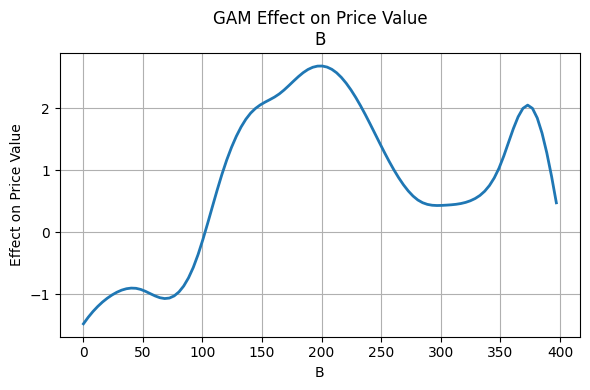

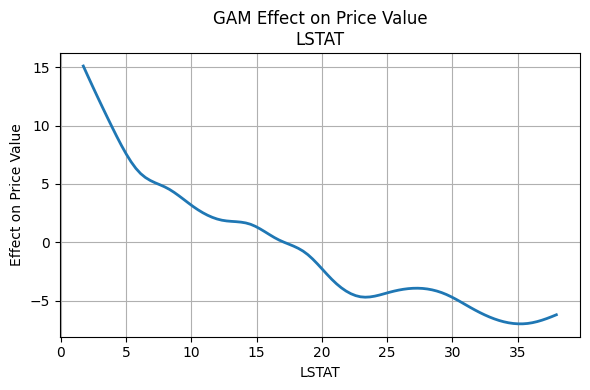

In [24]:
if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

y = y.values if hasattr(y, "values") else y

# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Build GAM model
# ==============================
# Create terms properly
terms = s(0, n_splines=20)
for i in range(1, X_train.shape[1]):
    terms += s(i, n_splines=20)

gam = LinearGAM(terms).fit(X_train, y_train)

# ==============================
# Predict
# ==============================
test_pred = gam.predict(X_test)

# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("GAM (Generalized Additive Model) – Price Value")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# ==============================
# Statistical Summary
# ==============================
gam.summary()

# ==============================
# Feature Effect / Partial Dependence Plots
# ==============================
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 4))
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), linewidth=2)
    plt.title(f"GAM Effect on Price Value\n{feature}")
    plt.xlabel(feature)
    plt.ylabel("Effect on Price Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
/tmp/ipython-input-272238542.py:65: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 





GAM (Generalized Additive Model) – Price Value
Train RMSE : 2.9950
Test  RMSE : 3.2867
MAE        : 2.1787
R²         : 0.8527

Model Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     68.3103
Link Function:                     IdentityLink Log Likelihood:                                 -1019.6712
Number of Samples:                          404 AIC:                                             2177.9631
                                                AICc:                                            2207.1712
                                                GCV:                                               15.3961
                                                Scale:                                              3.2856


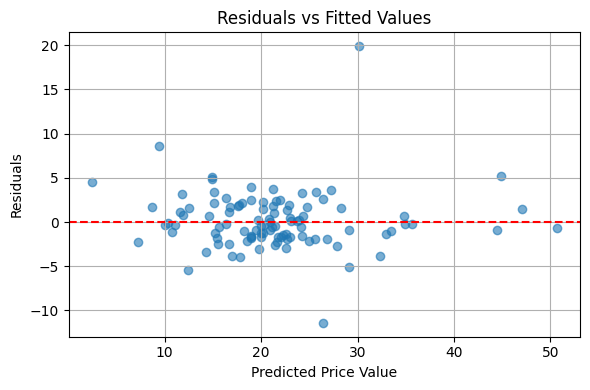

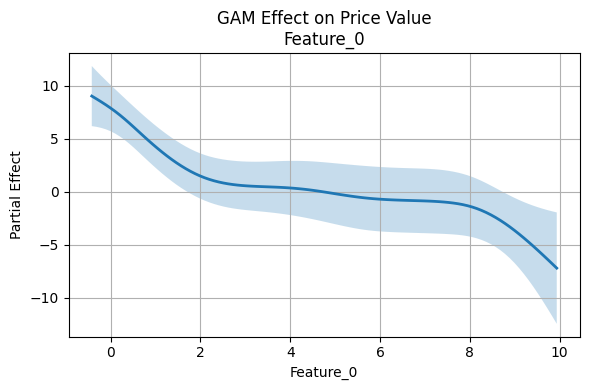

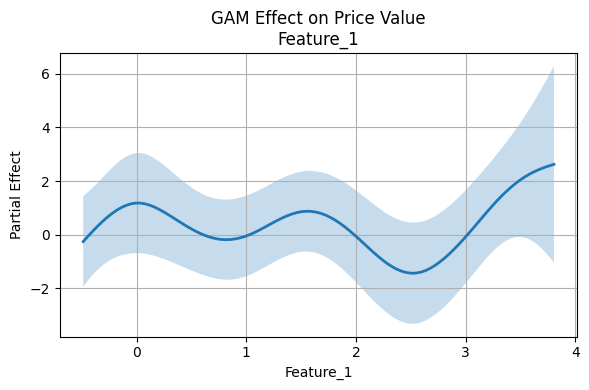

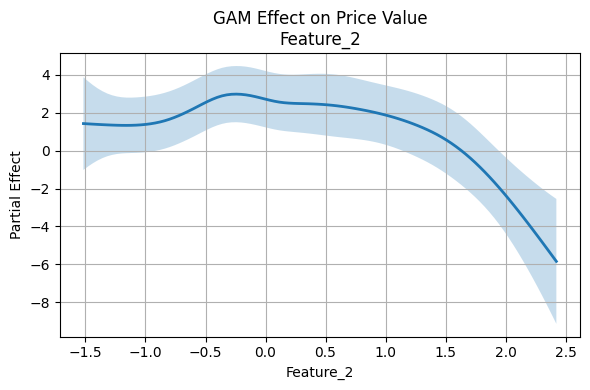

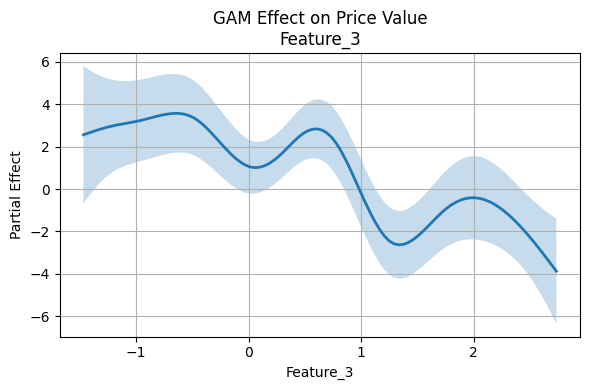

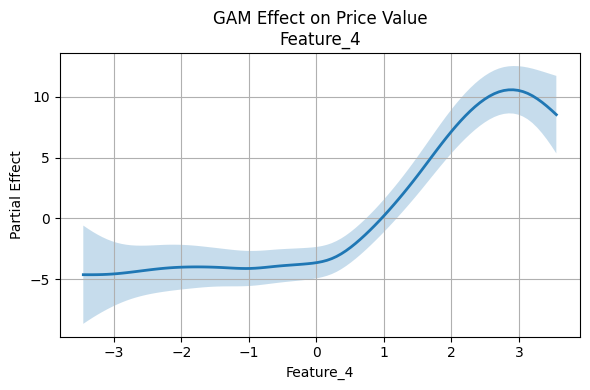

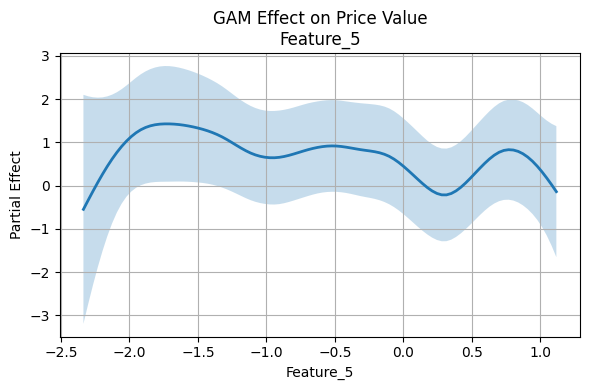

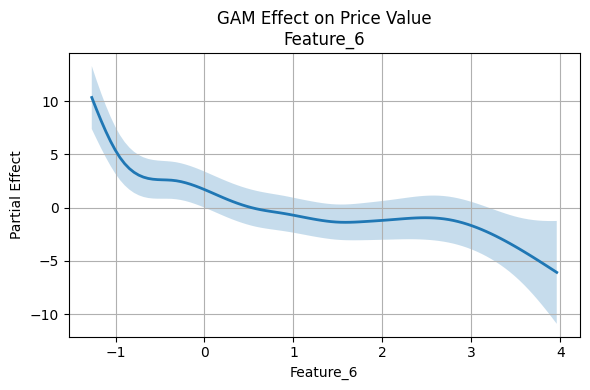

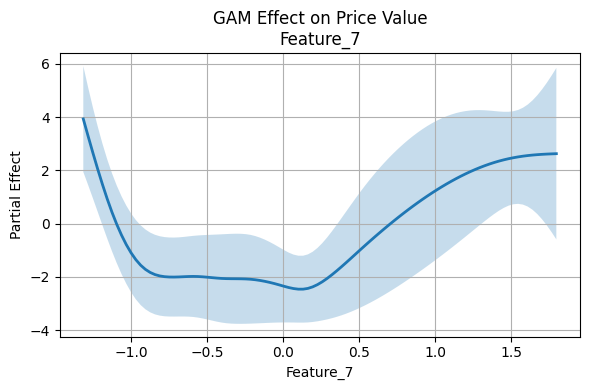

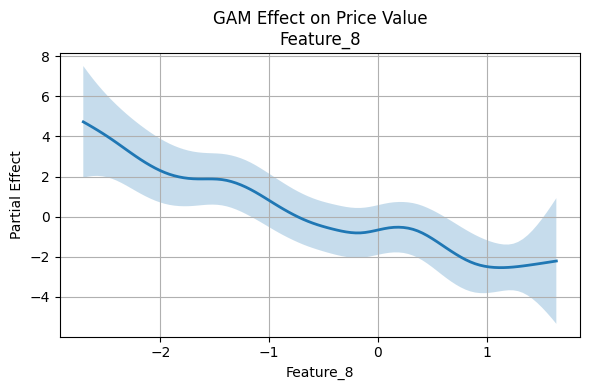

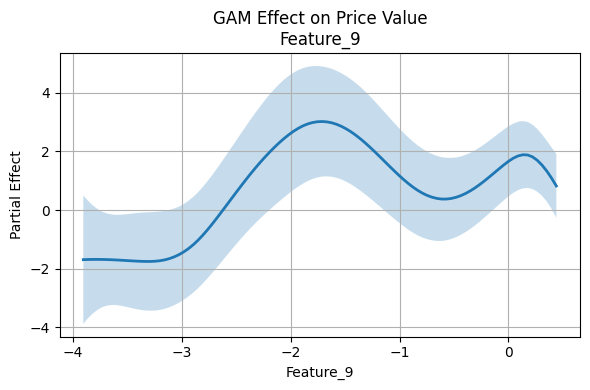

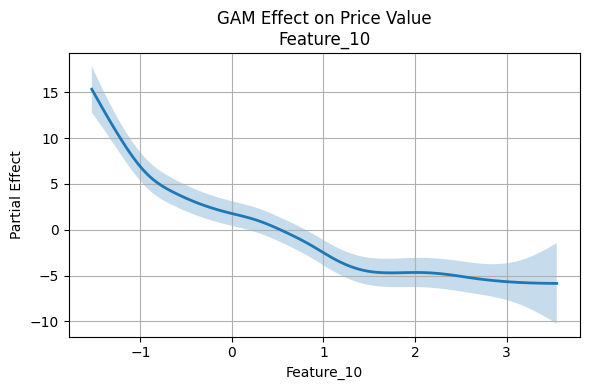


Optimal lambda values per term:
[[np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)], [np.float64(3.981071705534969)]]


In [25]:
# ==============================
# Load / Prepare Data
# ==============================
# X can be pandas DataFrame OR numpy array
# y can be pandas Series OR numpy array

if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

y = y.values if hasattr(y, "values") else y

# ==============================
# Feature Scaling
# ==============================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ==============================
# Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Build GAM Terms
# ==============================
terms = s(0, n_splines=20)
for i in range(1, X_train.shape[1]):
    terms += s(i, n_splines=20)

# ==============================
# Train GAM (correct λ handling)
# ==============================
gam = LinearGAM(terms)
gam.gridsearch(X_train, y_train)

# ==============================
# Predictions
# ==============================
train_pred = gam.predict(X_train)
test_pred = gam.predict(X_test)

# ==============================
# Evaluation
# ==============================
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("\nGAM (Generalized Additive Model) – Price Value")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test  RMSE : {test_rmse:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"R²         : {r2:.4f}")

# ==============================
# Model Summary
# ==============================
print("\nModel Summary:")
gam.summary()

# ==============================
# Residual Diagnostics
# ==============================
residuals = y_test - test_pred

plt.figure(figsize=(6, 4))
plt.scatter(test_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price Value")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# Partial Dependence Plots
# ==============================
for i, feature in enumerate(feature_names):

    plt.figure(figsize=(6, 4))

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.plot(XX[:, i], pdep, linewidth=2)
    plt.fill_between(
        XX[:, i],
        confi[:, 0],
        confi[:, 1],
        alpha=0.25
    )

    plt.title(f"GAM Effect on Price Value\n{feature}")
    plt.xlabel(feature)
    plt.ylabel("Partial Effect")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ==============================
# Optimal lambda values
# ==============================
print("\nOptimal lambda values per term:")
print(gam.lam)
